In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.linear.models.svm import SVM
from src.linear.models.linear import LinearRegression

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/Boston.csv')
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
scaled_df = StandardScaler().fit_transform(df)
x_df = scaled_df[:, :-1]
y_df = scaled_df[:, -1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 14), (404,), (102, 14), (102,))

In [6]:
model = LinearRegression()
model.compile(optimizer='sgd', loss='huber')

In [7]:
# model.fit(x_train, y_train, epochs=100)

In [8]:
# model.plot_loss_trend()

In [9]:
from src.tree.factory import IdentificationTreeFactory
from src.ensembles.bagging.factory import BaggingFactory
from src.ensembles.boosting.gradient import GradientBoostedRegressionTree

In [10]:
bagged_model = BaggingFactory.create("regressor")
bagged_model.compile(
    estimator=model, 
    n_estimators=10
)

In [11]:
# bagged_model.fit(x_train, y_train, epochs=100, verbose=1)

In [12]:
model = GradientBoostedRegressionTree()
model.compile()


-------------------[Iteration 0/10]---------------------
Error : 0.7099932026035407
-------------------[Iteration 1/10]---------------------
Error : 0.5104635370231868
-------------------[Iteration 2/10]---------------------
Error : 0.37683780636572595
-------------------[Iteration 3/10]---------------------
Error : 0.28214582483865536
-------------------[Iteration 4/10]---------------------
Error : 0.21649235013095483
-------------------[Iteration 5/10]---------------------
Error : 0.17272217445868393
-------------------[Iteration 6/10]---------------------
Error : 0.14154078353651872
-------------------[Iteration 7/10]---------------------
Error : 0.11826105330710142
-------------------[Iteration 8/10]---------------------
Error : 0.10012197829318678
-------------------[Iteration 9/10]---------------------
Error : 0.08736138022604638


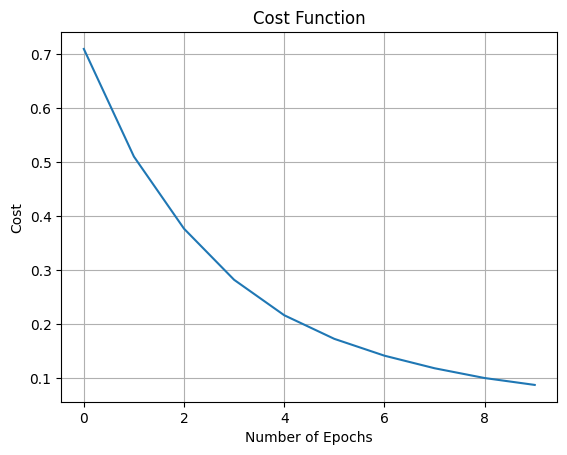

In [13]:
model.fit(x_train, y_train)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, model.predict(x_test))

0.28992923662661263